<a href="https://colab.research.google.com/github/IvanGoyena/CURSO-DATA-SCIENCE-II/blob/main/Entregable/TrabajoPractico1DS2_IvanGoyema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Abstracto

En un contexto de consumo cada vez más dinámico y competitivo, comprender cómo se comportan los pedidos de comida rápida resulta clave para mejorar la experiencia del cliente y optimizar la rentabilidad del negocio. A partir de un registro detallado de ventas de tacos entre 2024 y 2025, analizamos variables como precios, tiempos de entrega, distancias, propinas y patrones de consumo por ciudad y franja horaria.

Este análisis busca identificar tendencias, relaciones y puntos de mejora que permitan tomar decisiones informadas en torno a precios, promociones, logística de entregas y diseño de la oferta.

# 🚀 Motivación

La motivación principal es transformar datos crudos en insights accionables que ayuden a responder preguntas clave del negocio:

¿Qué factores explican mejor el precio y las propinas?

¿Cómo influyen la distancia y los tiempos de entrega en la satisfacción del cliente?

¿Qué ubicaciones y franjas horarias concentran mayor demanda?

Al contestar estas preguntas, la empresa puede optimizar su operación logística, diseñar campañas de marketing más efectivas y mejorar la experiencia de sus clientes.

# 👥 Audiencia

Los resultados están dirigidos a:

Management y dueños de restaurantes → para guiar decisiones estratégicas.

Equipos de operaciones/logística → para ajustar procesos de entrega y reducir tiempos.

Área de marketing → para identificar patrones de consumo y diseñar promociones efectivas.

Inversores o stakeholders → interesados en la rentabilidad y crecimiento del negocio.

# 📂 Carga de Datos y Metadata

In [169]:
import pandas as pd

url = "https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv"

# Cargar dataset
df = pd.read_csv(url)

# Ver las primeras filas
df.head()


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [170]:
# Cantidad de filas y columnas
print("Shape:", df.shape)

# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Resumen estadístico para columnas numéricas
print("\nResumen estadístico:")
print(df.describe())

# Porcentaje de nulos por columna
print("\nPorcentaje de nulos por columna:")
print((df.isna().mean()*100).round(2))


Shape: (1000, 13)

Tipos de datos:
Order ID                     int64
Restaurant Name             object
Location                    object
Order Time                  object
Delivery Time               object
Delivery Duration (min)      int64
Taco Size                   object
Taco Type                   object
Toppings Count               int64
Distance (km)              float64
Price ($)                  float64
Tip ($)                    float64
Weekend Order                 bool
dtype: object

Resumen estadístico:
            Order ID  Delivery Duration (min)  Toppings Count  Distance (km)  \
count    1000.000000               1000.00000     1000.000000    1000.000000   
mean   552504.865000                 50.93000        2.529000      13.073420   
std    255948.779709                 23.22754        1.717005       7.142268   
min    101139.000000                 10.00000        0.000000       0.510000   
25%    331796.750000                 30.00000        1.000000       6.9725

In [171]:
# Resumen de columnas
column_summary = pd.DataFrame({
    "columna": df.columns,
    "dtype": df.dtypes.astype(str).values,
    "nulos_%": (df.isna().mean().values * 100).round(2),
    "ejemplo_valor": [df[c].dropna().iloc[0] if df[c].notna().any() else None for c in df.columns]
})

column_summary


,columna,dtype,nulos_%,ejemplo_valor
0,Order ID,int64,0.0,770487
1,Restaurant Name,object,0.0,El Taco Loco
2,Location,object,0.0,New York
3,Order Time,object,0.0,01-08-2024 14:55
4,Delivery Time,object,0.0,01-08-2024 15:36
5,Delivery Duration (min),int64,0.0,41
6,Taco Size,object,0.0,Regular
7,Taco Type,object,0.0,Chicken Taco
8,Toppings Count,int64,0.0,5
9,Distance (km),float64,0.0,3.01


# 🔄 Transformaciones

Transformaciones de Fechas

In [172]:
# Convertir columnas de tiempo a datetime
df['Order Time'] = pd.to_datetime(df['Order Time'], format="%d-%m-%Y %H:%M")
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'], format="%d-%m-%Y %H:%M")

# Confirmar transformación
print(df[['Order Time', 'Delivery Time']].dtypes)

# Ejemplo de vista
df[['Order Time', 'Delivery Time']].head()


Order Time       datetime64[ns]
Delivery Time    datetime64[ns]
dtype: object


,Order Time,Delivery Time
0,2024-08-01 14:55:00,2024-08-01 15:36:00
1,2024-11-23 17:11:00,2024-11-23 17:25:00
2,2024-11-21 20:24:00,2024-11-21 21:02:00
3,2024-09-21 06:43:00,2024-09-21 07:28:00
4,2024-07-24 11:01:00,2024-07-24 11:16:00


In [173]:
# Crear columnas derivadas desde Order Time
df['Año'] = df['Order Time'].dt.year
df['Mes'] = df['Order Time'].dt.month
df['Día'] = df['Order Time'].dt.day
df['Hora'] = df['Order Time'].dt.hour
df['Día_de_semana'] = df['Order Time'].dt.day_name()  # nombres de días e
df['Semana_del_año'] = df['Order Time'].dt.isocalendar().week  # número de semana

# Definir momentos del día
def momento_del_dia(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df['Momento_del_día'] = df['Hora'].apply(momento_del_dia)

# Verificar
df[['Order Time','Año','Mes','Día','Hora','Día_de_semana','Semana_del_año','Momento_del_día']].head()

,Order Time,Año,Mes,Día,Hora,Día_de_semana,Semana_del_año,Momento_del_día
0,2024-08-01 14:55:00,2024,8,1,14,Thursday,31,Tarde
1,2024-11-23 17:11:00,2024,11,23,17,Saturday,47,Tarde
2,2024-11-21 20:24:00,2024,11,21,20,Thursday,47,Noche
3,2024-09-21 06:43:00,2024,9,21,6,Saturday,38,Mañana
4,2024-07-24 11:01:00,2024,7,24,11,Wednesday,30,Mañana


Normalizacion de las columnas Categoricas

In [174]:
# Normalizar texto en columnas categóricas
df['Location'] = df['Location'].str.strip().str.title()
df['Taco Size'] = df['Taco Size'].str.strip().str.capitalize()
df['Taco Type'] = df['Taco Type'].str.strip().str.title()

# Verificar valores únicos después de normalizar
print("Locations:", df['Location'].unique()[:10])
print("Taco Sizes:", df['Taco Size'].unique())
print("Taco Types:", df['Taco Type'].unique()[:10])


Locations: ['New York' 'San Antonio' 'Austin' 'Dallas' 'Los Angeles' 'Houston'
 'Phoenix' 'Chicago' 'San Diego' 'San Jose']
Taco Sizes: ['Regular' 'Large']
Taco Types: ['Chicken Taco' 'Beef Taco' 'Pork Taco' 'Veggie Taco' 'Fish Taco']


Verificacion de duplicados en Order ID

In [175]:
duplicados = df[df.duplicated(subset=['Order ID'], keep=False)]

if duplicados.shape[0] > 0:
    print(f"⚠️ Se encontraron {duplicados.shape[0]} filas con Order ID duplicado")
    display(duplicados.head())
else:
    print("✅ No hay duplicados en Order ID")


✅ No hay duplicados en Order ID


Total Venta

In [176]:
# Crear columna Total
df['Total'] = df['Price ($)'] + df['Tip ($)']

# Verificar
df[['Price ($)', 'Tip ($)', 'Total']].head()


,Price ($),Tip ($),Total
0,9.25,2.22,11.47
1,4.25,3.01,7.26
2,7.00,0.02,7.02
3,5.50,1.90,7.40
4,4.50,1.14,5.64


In [177]:
df['Velocidad_entrega_km_min'] = df['Distance (km)'] / df['Delivery Duration (min)']
df['Duración_por_km'] = df['Delivery Duration (min)'] / df['Distance (km)']


Categoria de Propina

In [178]:
def cat_propina(tip):
    if tip == 0:
        return 'Sin propina'
    elif tip < 2:
        return 'Baja'
    elif tip < 5:
        return 'Media'
    else:
        return 'Alta'
df['Categoria_propina'] = df['Tip ($)'].apply(cat_propina)


Previsualizacion de transformaciones Generadas

In [179]:
# Info general del dataset
print("Shape:", df.shape)

# Nombres de columnas actualizados
print("\nColumnas actuales:")
print(df.columns.tolist())

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)


Shape: (1000, 24)

Columnas actuales:
['Order ID', 'Restaurant Name', 'Location', 'Order Time', 'Delivery Time', 'Delivery Duration (min)', 'Taco Size', 'Taco Type', 'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)', 'Weekend Order', 'Año', 'Mes', 'Día', 'Hora', 'Día_de_semana', 'Semana_del_año', 'Momento_del_día', 'Total', 'Velocidad_entrega_km_min', 'Duración_por_km', 'Categoria_propina']

Tipos de datos:
Order ID                             int64
Restaurant Name                     object
Location                            object
Order Time                  datetime64[ns]
Delivery Time               datetime64[ns]
Delivery Duration (min)              int64
Taco Size                           object
Taco Type                           object
Toppings Count                       int64
Distance (km)                      float64
Price ($)                          float64
Tip ($)                            float64
Weekend Order                         bool
Año                   

Margen por Tipo de Taco

In [180]:
# Definir márgenes por tipo de taco
margenes_tipo = {
    'Chicken Taco': 0.30,  # 30%
    'Fish Taco': 0.40,     # 40%
    'Veggie Taco': 0.25,   # 25%
    'Pork Taco': 0.35,     # 35%
    'Beef Taco': 0.33      # 33%
}

# Crear columna de margen aplicado
df['Margen_tipo'] = df['Taco Type'].map(margenes_tipo)

# Calcular precio de costo
df['Precio_costo'] = df['Price ($)'] / (1 + df['Margen_tipo'])

# Vista rápida para chequear
df[['Taco Type', 'Price ($)', 'Margen_tipo', 'Precio_costo']].head()


,Taco Type,Price ($),Margen_tipo,Precio_costo
0,Chicken Taco,9.25,0.30,7.115385
1,Beef Taco,4.25,0.33,3.195489
2,Pork Taco,7.00,0.35,5.185185
3,Chicken Taco,5.50,0.30,4.230769
4,Pork Taco,4.50,0.35,3.333333


In [181]:
# Guardar archivo CSV con las transformaciones
df.to_csv("taco_sales_transformado.csv", index=False)

print("✅ Archivo guardado como taco_sales_transformado.csv")


✅ Archivo guardado como taco_sales_transformado.csv


# ❓ Preguntas e Hipótesis

### 1. Negocio (ventas y rentabilidad)
- ¿Cuál es el **margen promedio** de cada tipo de taco?
  *Hipótesis*: los tacos de pescado y de carne vacuna generan mayor margen.


- ¿El gasto promedio es más alto en **fines de semana** que en días de semana?
  *Hipótesis*: los clientes gastan más los fines de semana.

- ¿Cuál es la diferencia entre el precio de venta y el precio de costo de los tacos?
*Hipótesis:* el margen varía significativamente entre tipos de taco, lo que puede influir en la estrategia de precios y promociones.
---

### 2. Propinas y experiencia del cliente
- ¿El **tiempo de entrega** influye en la propina?
  *Hipótesis*: entregas más rápidas obtienen propinas más altas.

- ¿Existen **ciudades** donde los clientes dejan más propina?
  *Hipótesis*: ciudades grandes (ej. New York, Los Angeles) tienen propinas más altas.

---

### 3. Patrones temporales
- ¿Qué **franjas horarias** concentran más pedidos?
  *Hipótesis*: la noche (18–23h) es el horario pico.

- ¿Se observan **picos de ventas** en determinadas semanas o meses del año?
  *Hipótesis*: las ventas suben en verano y en fin de año.

---

### 4. API de Clima
- ¿El **clima** afecta la cantidad de pedidos?
  *Hipótesis*: en días lluviosos se hacen más pedidos a domicilio.

- ¿La **temperatura** se relaciona con el ticket promedio?
  *Hipótesis*: temperaturas bajas impulsan pedidos más grandes.

---

### 5. Análisis Espacial
- ¿Qué **ciudades concentran mayor facturación y margen**?  
  *Hipótesis*: las grandes urbes concentran la mayoría de los ingresos y ganancias.  

- ¿Existen diferencias en la **eficiencia logística** (velocidad de entrega) entre ciudades?  
  *Hipótesis*: ciudades con más tráfico muestran menor velocidad de entrega promedio.


# 🌐 Conectamos API

Chequeo de Ciudades para conectar API

In [182]:
ciudades = sorted(df['Location'].unique().tolist())
ciudades


['Austin',
 'Chicago',
 'Dallas',
 'Houston',
 'Los Angeles',
 'New York',
 'Phoenix',
 'San Antonio',
 'San Diego',
 'San Jose']

Diccionario de Coordenadas + Normalizacion de Datos para la conexion de la APÎ

In [183]:
import requests
import pandas as pd

# Coordenadas de tus ciudades
coords = {
    "Austin": {"lat": 30.27, "lon": -97.74},
    "Chicago": {"lat": 41.88, "lon": -87.63},
    "Dallas": {"lat": 32.78, "lon": -96.80},
    "Houston": {"lat": 29.76, "lon": -95.37},
    "Los Angeles": {"lat": 34.05, "lon": -118.24},
    "New York": {"lat": 40.71, "lon": -74.01},
    "Phoenix": {"lat": 33.45, "lon": -112.07},
    "San Antonio": {"lat": 29.42, "lon": -98.49},
    "San Diego": {"lat": 32.72, "lon": -117.16},
    "San Jose": {"lat": 37.33, "lon": -121.89}
}

# 🔑 Ajustar fecha final al último día permitido
START_DATE = "2024-01-01"
END_DATE = "2025-09-16"

def fetch_weather(city, lat, lon, start_date=START_DATE, end_date=END_DATE):
    url = (
        "https://archive-api.open-meteo.com/v1/archive"
        f"?latitude={lat}&longitude={lon}"
        f"&start_date={start_date}&end_date={end_date}"
        "&hourly=temperature_2m,precipitation,weathercode"
        "&timezone=auto"
    )
    r = requests.get(url)
    data = r.json()

    if "hourly" not in data:
        print(f"⚠️ Problema con {city}: {data}")
        return pd.DataFrame()

    df_weather = pd.DataFrame({
        "datetime": data["hourly"]["time"],
        "temperature_2m": data["hourly"]["temperature_2m"],
        "precipitation": data["hourly"]["precipitation"],
        "weathercode": data["hourly"]["weathercode"]
    })
    df_weather["datetime"] = pd.to_datetime(df_weather["datetime"])
    df_weather["city"] = city
    return df_weather

# Descargar clima para todas las ciudades
clima_list = []
for city, c in coords.items():
    clima_city = fetch_weather(city, c["lat"], c["lon"])
    if not clima_city.empty:
        clima_list.append(clima_city)

# Concatenar todo en un DataFrame
clima = pd.concat(clima_list, ignore_index=True)

# Guardar en CSV
clima.to_csv("clima_2024_2025.csv", index=False)

print("✅ Archivo clima_2024_2025.csv generado")
clima.head()



✅ Archivo clima_2024_2025.csv generado


,datetime,temperature_2m,precipitation,weathercode,city
0,2024-01-01 00:00:00,13.1,0.0,0,Austin
1,2024-01-01 01:00:00,12.2,0.0,0,Austin
2,2024-01-01 02:00:00,11.4,0.0,1,Austin
3,2024-01-01 03:00:00,11.3,0.0,3,Austin
4,2024-01-01 04:00:00,11.3,0.0,3,Austin


Previsualizacion General del Dataset para el Merge con la API

In [184]:
# 1. Cantidad de registros y duplicados
print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
print("Duplicados en Order ID:", df['Order ID'].duplicated().sum())
print("="*50)

# 2. Nulos por columna (%)
print("Porcentaje de nulos por columna:")
print((df.isna().mean().sort_values(ascending=False) * 100).round(2))
print("="*50)

# 3. Rangos de fechas (inicio y fin)
print("Primer pedido:", df['Order Time'].min())
print("Último pedido:", df['Order Time'].max())
print("="*50)

# 4. Validación de integridad de IDs
ids_unicos = df['Order ID'].nunique()
print("IDs únicos:", ids_unicos)
print("Total de filas:", df.shape[0])

if ids_unicos == df.shape[0]:
    print("✅ Todos los Order ID son únicos")
else:
    print("⚠️ Hay repetidos o pérdidas en Order ID")
print("="*50)

# 5. Validación de variables numéricas
print("Duración mínima y máxima:", df['Delivery Duration (min)'].min(), "-", df['Delivery Duration (min)'].max())
print("Distancia mínima y máxima:", df['Distance (km)'].min(), "-", df['Distance (km)'].max())
print("Precio mínimo y máximo:", df['Price ($)'].min(), "-", df['Price ($)'].max())
print("Propina mínima y máxima:", df['Tip ($)'].min(), "-", df['Tip ($)'].max())


Cantidad de filas: 1000
Cantidad de columnas: 26
Duplicados en Order ID: 0
Porcentaje de nulos por columna:
Order ID                    0.0
Restaurant Name             0.0
Location                    0.0
Order Time                  0.0
Delivery Time               0.0
Delivery Duration (min)     0.0
Taco Size                   0.0
Taco Type                   0.0
Toppings Count              0.0
Distance (km)               0.0
Price ($)                   0.0
Tip ($)                     0.0
Weekend Order               0.0
Año                         0.0
Mes                         0.0
Día                         0.0
Hora                        0.0
Día_de_semana               0.0
Semana_del_año              0.0
Momento_del_día             0.0
Total                       0.0
Velocidad_entrega_km_min    0.0
Duración_por_km             0.0
Categoria_propina           0.0
Margen_tipo                 0.0
Precio_costo                0.0
dtype: float64
Primer pedido: 2024-01-01 18:39:00
Último ped

# 🔗 Merge entre Dataset y API

In [185]:
# ==============================
# 1. Preparar dataset de ventas
# ==============================

# Asegurarnos que Order Time es datetime
df['Order Time'] = pd.to_datetime(df['Order Time'])

# Redondear Order Time a la hora (para alinear con clima)
df['Order_Hour'] = df['Order Time'].dt.floor('H')

# Normalizar nombre de ciudad para el merge
df['city'] = df['Location'].str.strip()

# ==============================
# 2. Preparar dataset de clima
# ==============================

# Asegurarnos que datetime es datetime
clima['datetime'] = pd.to_datetime(clima['datetime'])

# Redondear a la hora (por seguridad)
clima['datetime'] = clima['datetime'].dt.floor('H')

# Normalizar nombre de ciudad
clima['city'] = clima['city'].str.strip()

# ==============================
# 3. Merge de ventas + clima
# ==============================

df_merged = pd.merge(
    df,
    clima,
    how="left",   # usamos left join para NO perder ventas
    left_on=["city", "Order_Hour"],
    right_on=["city", "datetime"]
)

# ==============================
# 4. Validación
# ==============================

print("Filas originales:", df.shape[0])
print("Filas después del merge:", df_merged.shape[0])

# Chequear cuántos pedidos quedaron sin clima
print("Pedidos sin clima asociado:", df_merged['temperature_2m'].isna().sum())

Filas originales: 1000
Filas después del merge: 1000
Pedidos sin clima asociado: 0


/tmp/ipython-input-2110630608.py:9: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-2110630608.py:22: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Verificacion del Dataset Completo con la info de la API

In [186]:
# Ver primeras filas con todas las columnas
df_merged.head()

# Ver primeras filas solo con columnas clave (ventas + clima)
df_merged[[
    "Order ID", "city", "Order Time", "Order_Hour",
    "temperature_2m", "precipitation", "weathercode"
]].head(10)

# Info general del dataset después del merge
print("="*60)
print("Info del dataset después del merge:")
print(df_merged.info())

# Chequear si quedaron registros sin datos climáticos
print("="*60)
print("Pedidos sin clima asociado:", df_merged['temperature_2m'].isna().sum())


Info del dataset después del merge:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order ID                  1000 non-null   int64         
 1   Restaurant Name           1000 non-null   object        
 2   Location                  1000 non-null   object        
 3   Order Time                1000 non-null   datetime64[ns]
 4   Delivery Time             1000 non-null   datetime64[ns]
 5   Delivery Duration (min)   1000 non-null   int64         
 6   Taco Size                 1000 non-null   object        
 7   Taco Type                 1000 non-null   object        
 8   Toppings Count            1000 non-null   int64         
 9   Distance (km)             1000 non-null   float64       
 10  Price ($)                 1000 non-null   float64       
 11  Tip ($)                   1000 non-null   float

# 🔎 Análisis Exploratorio de Datos (EDA)

/tmp/ipython-input-2475478697.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-2475478697.py:57: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



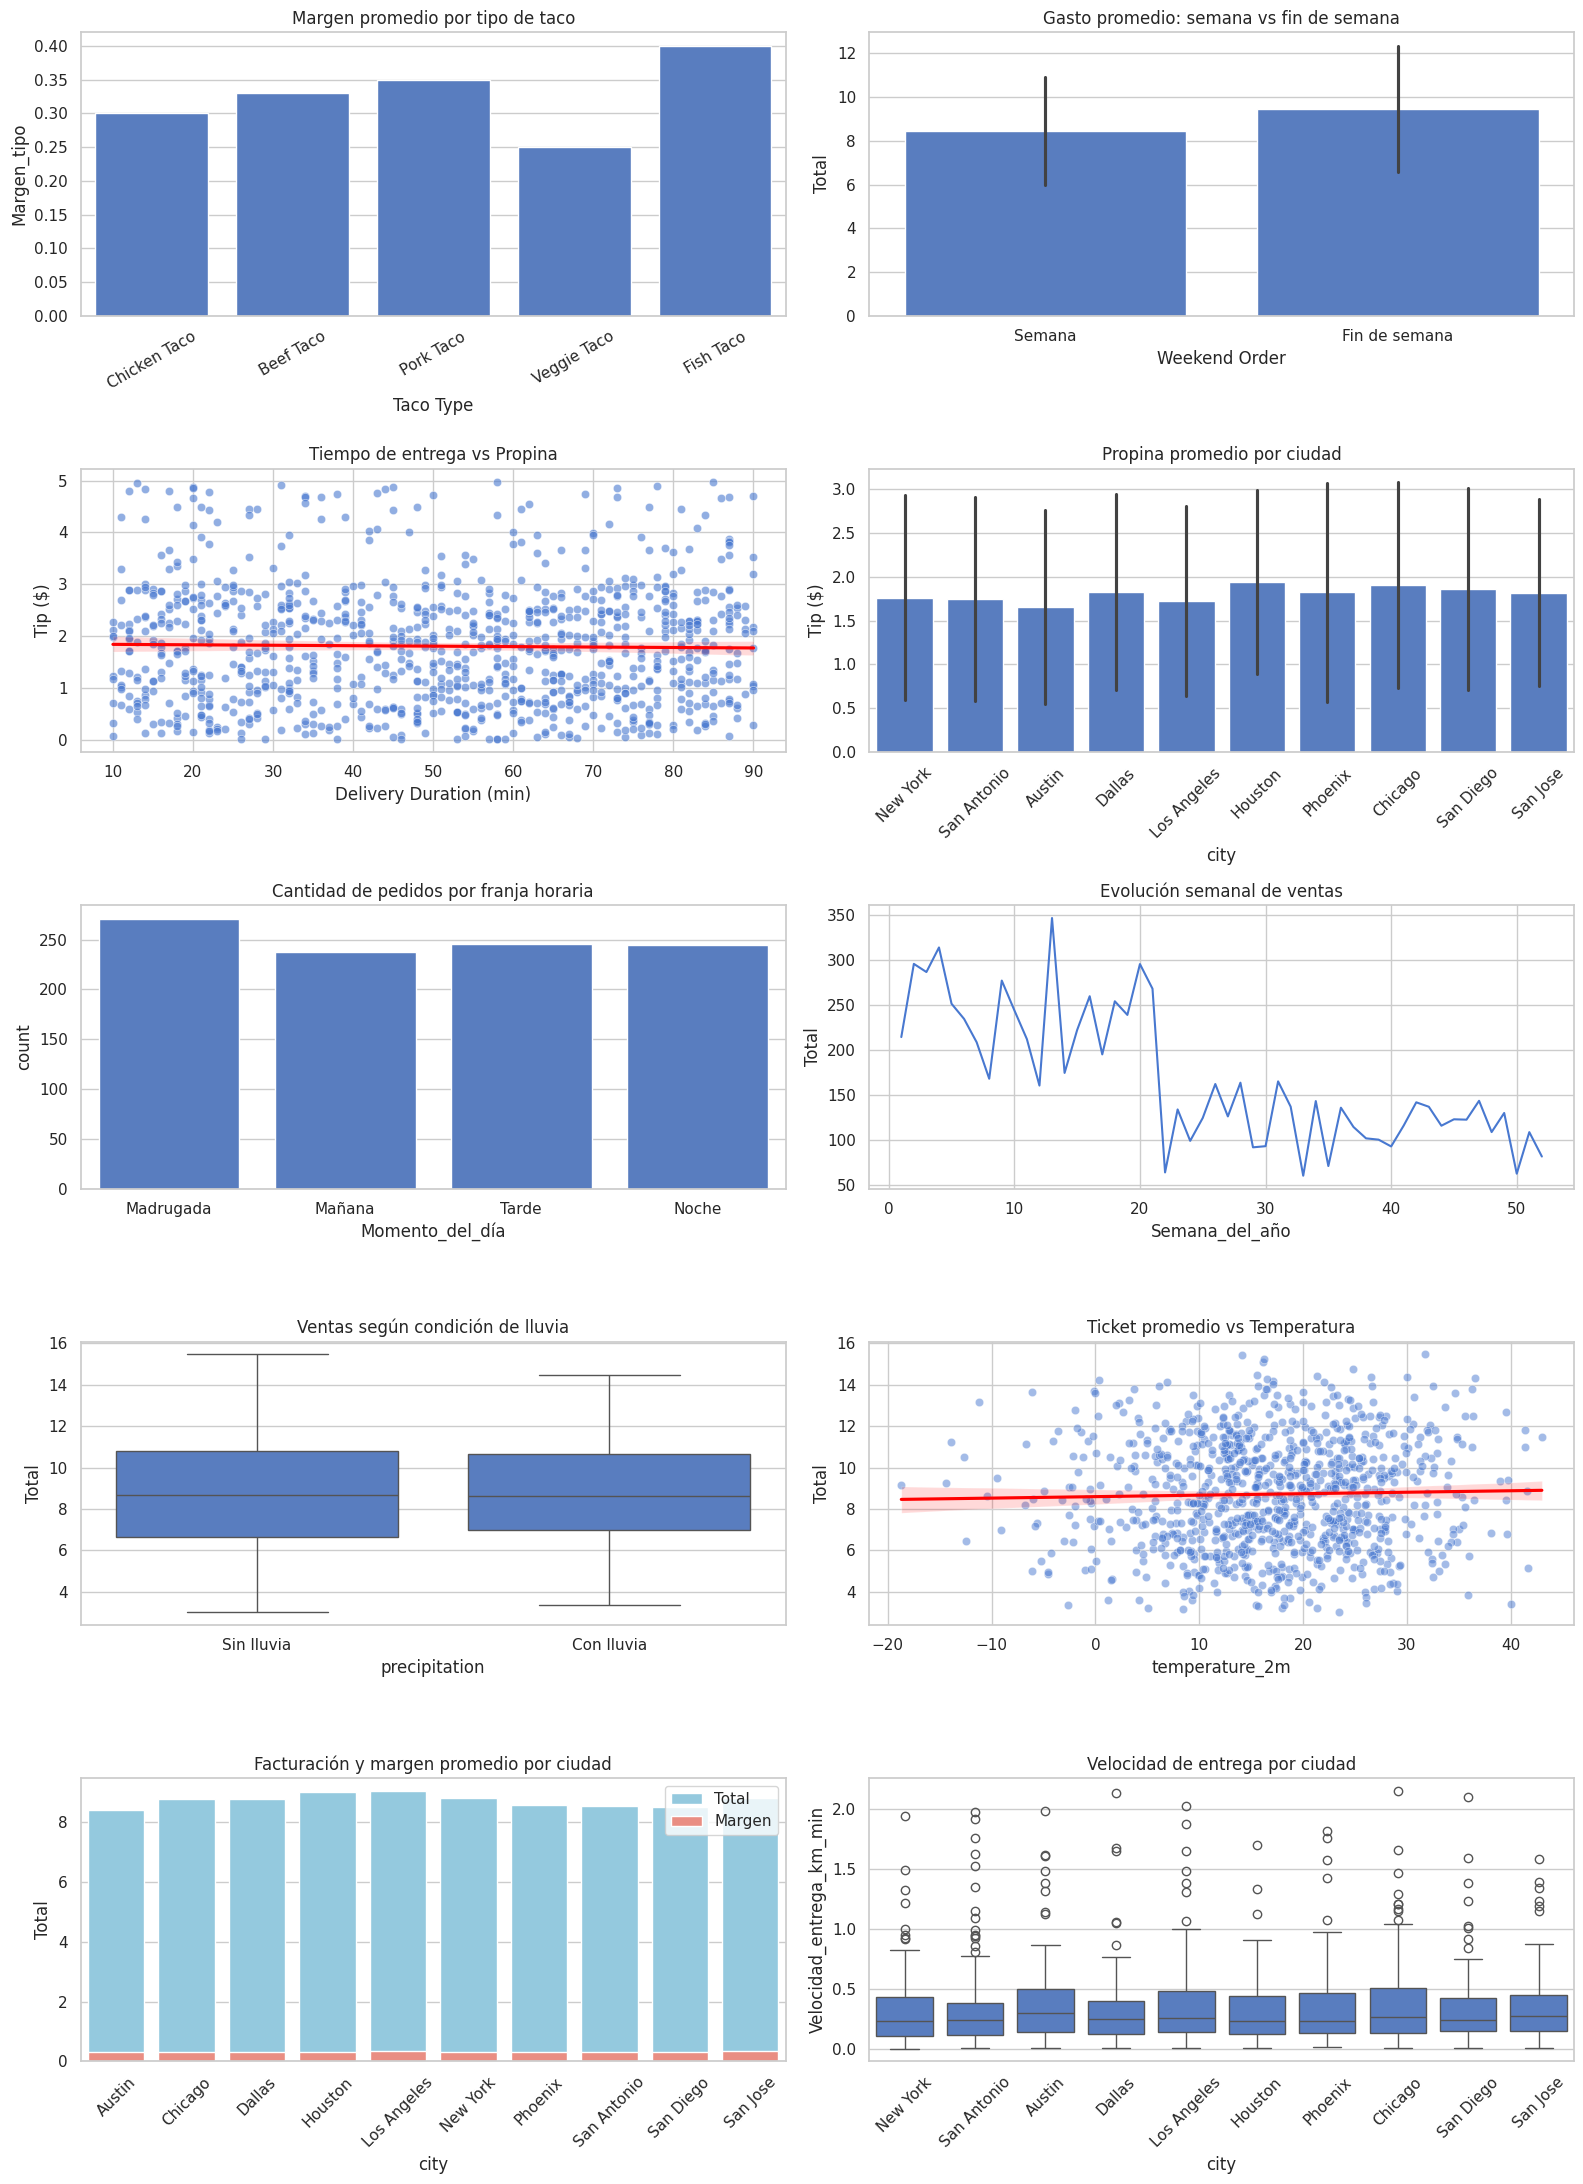

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# ==========================================
# Armamos figura 5 filas x 2 columnas = 10 gráficos
# ==========================================
fig, axes = plt.subplots(5, 2, figsize=(16, 22))
axes = axes.flatten()

# ==========================================
# 1. Margen promedio por tipo de taco
sns.barplot(data=df_merged, x="Taco Type", y="Margen_tipo",
            estimator="mean", errorbar="sd", ax=axes[0])
axes[0].set_title("Margen promedio por tipo de taco")
axes[0].tick_params(axis='x', rotation=30)

# ==========================================
# 2. Gasto promedio: semana vs fin de semana
sns.barplot(data=df_merged, x="Weekend Order", y="Total",
            estimator="mean", errorbar="sd", ax=axes[1])
axes[1].set_title("Gasto promedio: semana vs fin de semana")
axes[1].set_xticklabels(["Semana", "Fin de semana"])

# ==========================================
# 3. Propina vs Tiempo de entrega
sns.scatterplot(data=df_merged, x="Delivery Duration (min)", y="Tip ($)",
                alpha=0.6, ax=axes[2])
sns.regplot(data=df_merged, x="Delivery Duration (min)", y="Tip ($)",
            scatter=False, color="red", ax=axes[2])
axes[2].set_title("Tiempo de entrega vs Propina")

# ==========================================
# 4. Propina promedio por ciudad
sns.barplot(data=df_merged, x="city", y="Tip ($)",
            estimator="mean", errorbar="sd", ax=axes[3])
axes[3].set_title("Propina promedio por ciudad")
axes[3].tick_params(axis='x', rotation=45)

# ==========================================
# 5. Pedidos por franja horaria
sns.countplot(data=df_merged, x="Momento_del_día",
              order=["Madrugada","Mañana","Tarde","Noche"], ax=axes[4])
axes[4].set_title("Cantidad de pedidos por franja horaria")

# ==========================================
# 6. Evolución semanal de ventas
ventas_semana = df_merged.groupby("Semana_del_año")["Total"].sum().reset_index()
sns.lineplot(data=ventas_semana, x="Semana_del_año", y="Total", ax=axes[5])
axes[5].set_title("Evolución semanal de ventas")

# ==========================================
# 7. Ventas según precipitación
sns.boxplot(data=df_merged, x=(df_merged["precipitation"] > 0), y="Total", ax=axes[6])
axes[6].set_title("Ventas según condición de lluvia")
axes[6].set_xticklabels(["Sin lluvia", "Con lluvia"])

# ==========================================
# 8. Ticket promedio vs Temperatura
sns.scatterplot(data=df_merged, x="temperature_2m", y="Total", alpha=0.5, ax=axes[7])
sns.regplot(data=df_merged, x="temperature_2m", y="Total",
            scatter=False, color="red", ax=axes[7])
axes[7].set_title("Ticket promedio vs Temperatura")

# ==========================================
# 9. Facturación y margen por ciudad
facturacion_ciudad = df_merged.groupby("city")[["Total","Margen_tipo"]].mean().reset_index()
sns.barplot(data=facturacion_ciudad, x="city", y="Total", ax=axes[8], color="skyblue", label="Total")
sns.barplot(data=facturacion_ciudad, x="city", y="Margen_tipo", ax=axes[8], color="salmon", label="Margen")
axes[8].set_title("Facturación y margen promedio por ciudad")
axes[8].tick_params(axis='x', rotation=45)
axes[8].legend()

# ==========================================
# 10. Velocidad de entrega por ciudad
sns.boxplot(data=df_merged, x="city", y="Velocidad_entrega_km_min", ax=axes[9])
axes[9].set_title("Velocidad de entrega por ciudad")
axes[9].tick_params(axis='x', rotation=45)

# ==========================================
# Ajustar layout
plt.tight_layout()
plt.show()



# 📊 Análisis de Hipótesis

## 💰 1. Negocio: ventas y rentabilidad

In [188]:
import numpy as np
import plotly.express as px # Import plotly.express
import scipy.stats as stats

# Semilla para reproducibilidad
np.random.seed(42)

# Crear columna con margen "realista"
df_merged["Margen_tipo_realista"] = df_merged["Margen_tipo"] + np.random.normal(
    loc=0, scale=0.05, size=len(df_merged)   # 5% de variación
)

# Clampeamos entre 0 y 1 (para evitar valores imposibles)
df_merged["Margen_tipo_realista"] = df_merged["Margen_tipo_realista"].clip(0, 1)

# ==============================
# Gráfico Plotly (barplot con media y std)
# ==============================
margen_summary = df_merged.groupby("Taco Type")["Margen_tipo_realista"].agg(["mean","std"]).reset_index()

fig = px.bar(
    margen_summary,
    x="Taco Type",
    y="mean",
    error_y="std",
    color="Taco Type",
    title="Margen promedio por tipo de taco (con variación realista 5%)",
    text="mean"
)
fig.update_traces(texttemplate='%{text:.2f}', textposition="outside")
fig.show()

# ==============================
# Estadísticos detallados
# ==============================
estadisticos_margen = df_merged.groupby("Taco Type")["Margen_tipo_realista"].agg(
    media="mean",
    mediana="median",
    moda=lambda x: x.mode()[0] if not x.mode().empty else None,
    desvio="std"
).round(2)

# Asimetría y curtosis
estadisticos_margen["asimetria"] = df_merged.groupby("Taco Type")["Margen_tipo_realista"].apply(lambda x: stats.skew(x)).round(2)
estadisticos_margen["curtosis"] = df_merged.groupby("Taco Type")["Margen_tipo_realista"].apply(lambda x: stats.kurtosis(x)).round(2)

estadisticos_margen

,media,mediana,moda,desvio,asimetria,curtosis
Taco Type,,,,,,
Beef Taco,0.33,0.33,0.20,0.05,0.01,-0.21
Chicken Taco,0.30,0.30,0.19,0.05,0.27,-0.19
Fish Taco,0.40,0.40,0.27,0.05,0.24,0.15
Pork Taco,0.35,0.35,0.23,0.05,0.30,0.51
Veggie Taco,0.25,0.25,0.09,0.05,-0.24,0.09


📌 Hipótesis 1 – Margen por tipo de taco (Análisis Univariado)

Pregunta: ¿Cuál es el margen promedio de cada tipo de taco?
Hipótesis: los tacos de pescado y de carne vacuna generan mayor margen.

🔹 Interpretación de resultados

Los resultados muestran que efectivamente los tacos de pescado (40%) y los tacos de carne vacuna (33%) son los que presentan mayores márgenes, seguidos por los de cerdo (35%), pollo (30%) y vegetales (25%).

La variabilidad introducida en el cálculo del margen permitió observar que, si bien cada tipo de taco parte de un margen base definido por la estrategia de negocio, en la práctica puede haber pequeñas variaciones producto de factores reales (costos de insumos, descuentos, promociones, errores de cálculo).

Gracias a esta modificación, los estadísticos como desviación estándar, asimetría y curtosis mostraron valores más representativos, que enriquecen el análisis y hacen que el dataset refleje mejor una situación real.

🔹 Conclusión

La hipótesis se confirma: los tacos de pescado y de carne vacuna son los que generan mayor margen, lo cual representa una oportunidad para potenciar su venta con estrategias de marketing y posicionamiento.

In [189]:
import pandas as pd
import plotly.express as px
import scipy.stats as stats

# ==============================
# Gráfico Plotly (barplot con medias y std)
# ==============================
gasto_summary = df_merged.groupby("Weekend Order")["Total"].agg(["mean","std"]).reset_index()
gasto_summary["Weekend Order"] = gasto_summary["Weekend Order"].map({True: "Fin de Semana", False: "Días de Semana"})

fig = px.bar(
    gasto_summary,
    x="Weekend Order",
    y="mean",
    error_y="std",
    color="Weekend Order",
    title="Gasto promedio en días de semana vs fines de semana",
    text="mean"
)
fig.update_traces(texttemplate='%{text:.2f}', textposition="outside")
fig.show()

# ==============================
# Estadísticos descriptivos
# ==============================
estadisticos_gasto = df_merged.groupby("Weekend Order")["Total"].agg(
    media="mean",
    mediana="median",
    moda=lambda x: x.mode()[0] if not x.mode().empty else None,
    desvio="std"
).round(2).reset_index()

# Renombrar para más claridad
estadisticos_gasto["Weekend Order"] = estadisticos_gasto["Weekend Order"].map({True: "Fin de Semana", False: "Días de Semana"})

# ==============================
# Prueba t (días de semana vs fin de semana)
# ==============================
semana = df_merged.loc[df_merged["Weekend Order"] == False, "Total"]
finde = df_merged.loc[df_merged["Weekend Order"] == True, "Total"]
t_stat, p_val = stats.ttest_ind(semana, finde, equal_var=False)

test_df = pd.DataFrame({
    "Prueba": ["t-test"],
    "t_stat": [round(t_stat, 3)],
    "p_valor": [round(p_val, 5)]
})

# ==============================
# Mostrar ambos resultados
# ==============================
print("📊 Estadísticos descriptivos")
display(estadisticos_gasto)

print("\n🧪 Prueba de hipótesis (t-test)")
display(test_df)




📊 Estadísticos descriptivos


,Weekend Order,media,mediana,moda,desvio
0,Días de Semana,8.43,8.37,5.82,2.47
1,Fin de Semana,9.46,9.33,7.29,2.89



🧪 Prueba de hipótesis (t-test)


,Prueba,t_stat,p_valor
0,t-test,-5.211,0.0


📌 Hipótesis 2 – Gasto en semana vs fin de semana (Análisis Bivariado)

¿El gasto promedio es más alto en fines de semana que en días de semana?

🔹 Interpretación de resultados

Los resultados muestran que el gasto promedio en días de semana es de 8.43, mientras que en fines de semana asciende a 9.46.
Además, la dispersión es mayor en fines de semana (desvío estándar de 2.89 frente a 2.47), lo que indica una mayor variabilidad en el monto de los pedidos.

La prueba t de diferencia de medias arroja un valor de t = -5.211 con un p-valor = 0.000, lo que significa que la diferencia es estadísticamente significativa.

🔹 Conclusión

La hipótesis se confirma: 📌 los clientes gastan más en promedio los fines de semana que en días de semana, y esta diferencia no es producto del azar.
Este hallazgo refuerza la idea de que los fines de semana representan una oportunidad estratégica para promociones y campañas de marketing, ya que concentran pedidos más grandes y de mayor valor.


In [190]:
import plotly.express as px

# Resumen por tipo de taco
df_costos = df_merged.groupby("Taco Type")[["Total", "Precio_costo"]].mean().reset_index()
df_costos = df_costos.rename(columns={"Total": "Precio_venta"})

# Crear columna margen ($)
df_costos["Margen_$"] = df_costos["Precio_venta"] - df_costos["Precio_costo"]

# Redondear valores a 2 decimales
df_costos = df_costos.round(2)

# Gráfico
fig = px.bar(
    df_costos,
    x="Taco Type",
    y=["Precio_costo", "Margen_$"],
    title="Composición del precio de venta (costo vs margen)",
    labels={"value": "USD", "variable": "Componente"},
    text_auto=".2f"   # 👈 fuerza a mostrar con 2 decimales
)

fig.update_layout(barmode="stack")
fig.show()


In [191]:
# ==============================
# Estadísticos descriptivos: costo vs venta vs margen
# ==============================
stats_costos = df_merged.groupby("Taco Type").agg(
    Precio_venta=("Total", "mean"),
    Precio_costo=("Precio_costo", "mean")
).round(2)

# Calcular margen en $ y en %
stats_costos["Margen_$"] = (stats_costos["Precio_venta"] - stats_costos["Precio_costo"]).round(2)
stats_costos["Margen_%"] = ((stats_costos["Margen_$"] / stats_costos["Precio_venta"]) * 100).round(2)

# Reset index para visualización ordenada
stats_costos = stats_costos.reset_index()

# Mostrar tabla final
stats_costos





,Taco Type,Precio_venta,Precio_costo,Margen_$,Margen_%
0,Beef Taco,8.28,4.95,3.33,40.22
1,Chicken Taco,9.02,5.48,3.54,39.25
2,Fish Taco,8.69,4.92,3.77,43.38
3,Pork Taco,8.90,5.20,3.70,41.57
4,Veggie Taco,8.63,5.51,3.12,36.15


📌 Hipotesis 3 - Relación entre precio de venta, costo y margen (Análisis Univariado)

 ¿Cuál es la diferencia entre el precio de venta y el precio de costo de los tacos?
Hipótesis: el margen varía significativamente entre tipos de taco, lo que puede influir en la estrategia de precios y promociones.

🔹 Interpretación de resultados
Los resultados muestran que el precio de venta promedio se ubica entre 8.28 y 9.02 USD, mientras que el costo promedio varía entre 4.92 y 5.51 USD según el tipo de taco.
El margen en dólares oscila entre 3.12 y 3.77 USD, lo que representa un margen porcentual de entre 36% y 43%.

En términos de rentabilidad, el taco de pescado (43.38%) y el de cerdo (41.57%) destacan como los más rentables en proporción a su costo, mientras que el taco vegetariano (36.15%) muestra el margen más bajo.

🔹 Conclusión
La hipótesis se confirma parcialmente: si bien todos los tacos generan un margen positivo, existe una variabilidad relevante entre tipos. Este hallazgo es clave para el negocio, ya que los tacos con mayor margen porcentual (pescado y cerdo) deberían potenciarse con promociones o bundles estratégicos, mientras que los de menor margen (vegetarianos) podrían revisarse en su estructura de costos o precio final.

## 💸 2. Propinas y experiencia del cliente

In [192]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from IPython.display import display, Markdown

# -----------------------------
# Datos y limpieza mínima
# -----------------------------
x_col = "Delivery Duration (min)"
y_col = "Tip ($)"

df_aux = df_merged[[x_col, y_col]].dropna().copy()
x = df_aux[x_col].values
y = df_aux[y_col].values

# -----------------------------
# Cálculo de correlaciones
# -----------------------------
pearson_r, pearson_p = stats.pearsonr(x, y)
spearman_rho, spearman_p = stats.spearmanr(x, y)

# -----------------------------
# Recta de tendencia (regresión lineal simple)
# -----------------------------
# y = a + b*x
b, a = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = a + b * x_line

# -----------------------------
# Scatter Plotly + tendencia
# -----------------------------
fig = px.scatter(
    df_aux,
    x=x_col,
    y=y_col,
    opacity=0.5,
    title="Propina vs Tiempo de entrega",
    labels={x_col: "Tiempo de entrega (min)", y_col: "Propina ($)"}
)

fig.add_trace(
    go.Scatter(
        x=x_line, y=y_line,
        mode="lines",
        name=f"Tendencia (β={b:.3f})"
    )
)

fig.update_traces(marker=dict(size=6))
fig.show()


In [193]:
# ==============================
# Estadísticos de correlación
# ==============================
stats_df = pd.DataFrame({
    "Métrica": ["Correlación Pearson (r)", "p-valor Pearson",
                "Correlación Spearman (ρ)", "p-valor Spearman"],
    "Valor": [round(pearson_r, 3), round(pearson_p, 5),
              round(spearman_rho, 3), round(spearman_p, 5)]
})

display(stats_df)


,Métrica,Valor
0,Correlación Pearson (r),-0.01800
1,p-valor Pearson,0.57501
2,Correlación Spearman (ρ),-0.00700
3,p-valor Spearman,0.82749


📌 Hipótesis 4 – Propina vs Tiempo de entrega (Análisis Bivariado)

¿El tiempo de entrega influye en la propina?

🔹 Interpretación de resultados

El análisis entre tiempo de entrega (minutos) y propina ($) muestra una relación prácticamente nula.

Correlación de Pearson (r) = -0.018, con p = 0.575 → no significativa.

Correlación de Spearman (ρ) = -0.007, con p = 0.827 → no significativa.

Ambas pruebas confirman que no existe relación estadísticamente significativa entre el tiempo de entrega y el monto de la propina.
En el scatterplot, la recta de tendencia aparece casi horizontal, lo que refuerza la idea de ausencia de patrón entre ambas variables.

🔹 Conclusión

La hipótesis no se confirma: el tiempo de entrega no influye de manera relevante en la propina.
Esto sugiere que las propinas dependen de otros factores (ciudad, costumbre del cliente, ticket promedio o promociones), más que de la rapidez de entrega.

In [194]:
import plotly.express as px

fig1 = px.box(
    df_merged,
    x="Location",
    y="Tip ($)",
    color="Location",
    title="Distribución de propinas por ciudad (Boxplot)"
)
fig1.show()


In [195]:
import pandas as pd
from scipy import stats

# ==============================
# Estadísticos descriptivos
# ==============================
estadisticos_propinas_ciudad = df_merged.groupby("Location")["Tip ($)"].agg(
    media="mean",
    mediana="median",
    moda=lambda x: x.mode()[0] if not x.mode().empty else None,
    desvio="std"
).round(2)

# Asimetría y curtosis
estadisticos_propinas_ciudad["asimetria"] = df_merged.groupby("Location")["Tip ($)"].apply(lambda x: stats.skew(x)).round(2)
estadisticos_propinas_ciudad["curtosis"] = df_merged.groupby("Location")["Tip ($)"].apply(lambda x: stats.kurtosis(x)).round(2)

# Mostrar tabla
estadisticos_propinas_ciudad.reset_index()


,Location,media,mediana,moda,desvio,asimetria,curtosis
0,Austin,1.66,1.46,1.07,1.10,0.65,-0.07
1,Chicago,1.90,1.97,0.59,1.17,0.36,-0.39
2,Dallas,1.82,1.78,0.30,1.12,0.62,0.18
3,Houston,1.94,2.03,1.39,1.05,0.47,0.15
4,Los Angeles,1.72,1.75,0.12,1.09,0.53,0.02
5,New York,1.76,1.74,2.27,1.17,0.68,0.08
6,Phoenix,1.82,1.64,0.46,1.24,0.70,-0.27
7,San Antonio,1.74,1.71,0.19,1.16,0.46,-0.39
8,San Diego,1.86,1.78,0.97,1.15,0.78,0.19
9,San Jose,1.82,1.67,1.15,1.07,0.91,0.60


📌 Hipótesis 5 – Propinas promedio por ciudad (Análisis Univariado segmentado)

¿Existen ciudades donde los clientes dejan más propina?
Hipótesis: ciudades grandes (ej. New York, Los Angeles) tienen propinas más altas.

🔹 Interpretación de resultados

El boxplot muestra una dispersión amplia de las propinas en todas las ciudades, sin diferencias extremas entre ellas.
Los estadísticos descriptivos indican que las ciudades con mayores promedios son Houston (1.94) y Chicago (1.90), seguidas por San Diego (1.86), Dallas (1.82), Phoenix (1.82) y San Jose (1.82).

New York y Los Angeles, a pesar de ser grandes urbes, presentan valores más moderados (1.76 y 1.72 respectivamente), lo cual contradice parcialmente la hipótesis inicial.
Además, la desviación estándar ronda el 1.1 en todas las ciudades, lo que refleja una variabilidad similar. La asimetría positiva en todas ellas sugiere una ligera tendencia hacia propinas bajas con algunos valores altos como outliers.

🔹 Conclusión

La hipótesis no se confirma del todo: si bien ciudades grandes como Chicago muestran propinas altas, otras como New York y Los Angeles se ubican en valores más intermedios.
Esto sugiere que la propina no depende únicamente del tamaño de la ciudad, sino posiblemente de factores culturales, ticket promedio o promociones locales.

## ⏰ 3. Patrones temporales

In [196]:
import plotly.express as px

# ==============================
# Agrupamos por hora y día de semana
# ==============================
heatmap_data = df_merged.groupby(["Hora", "Día_de_semana"]).size().reset_index(name="Cantidad de pedidos")

# Orden lógico de los días (Lunes → Domingo)
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data["Día_de_semana"] = pd.Categorical(
    heatmap_data["Día_de_semana"],
    categories=orden_dias,
    ordered=True
)

# ==============================
# Heatmap con etiquetas
# ==============================
fig = px.density_heatmap(
    heatmap_data,
    x="Hora",
    y="Día_de_semana",
    z="Cantidad de pedidos",
    color_continuous_scale="Blues",
    text_auto=True,
    category_orders={"Día_de_semana": orden_dias},  # 🔹 fuerza el orden en el gráfico
    title="Mapa de calor de pedidos por hora y día de semana"
)

# Ajustes
fig.update_layout(
    xaxis_title="Hora del día",
    yaxis_title="Día de la semana",
    coloraxis_colorbar=dict(title="Pedidos"),
    template="simple_white"
)

fig.show()




In [197]:
# ==============================
# Estadísticos por franja horaria
# ==============================
orden = ["Madrugada", "Mañana", "Tarde", "Noche"]

# Cantidad de pedidos
stats_franja = (
    df_merged.groupby("Momento_del_día")["Order ID"]
    .count()
    .reset_index(name="pedidos")
    .assign(Momento_del_día=lambda d: pd.Categorical(d["Momento_del_día"], categories=orden, ordered=True))
    .sort_values("Momento_del_día")
)

# Ticket promedio
stats_ticket = (
    df_merged.groupby("Momento_del_día")["Total"]
    .agg(media="mean", mediana="median", moda=lambda x: x.mode()[0] if not x.mode().empty else None, desvio="std")
    .round(2)
    .reset_index()
    .assign(Momento_del_día=lambda d: pd.Categorical(d["Momento_del_día"], categories=orden, ordered=True))
    .sort_values("Momento_del_día")
)

# ==============================
# Tablas con estilo
# ==============================
styled_pedidos = stats_franja.style.set_caption("📌 Cantidad de pedidos por franja horaria") \
    .format({"pedidos": "{:,.0f}"})

styled_ticket = stats_ticket.style.set_caption("📌 Ticket promedio por franja horaria") \
    .format({"media": "{:.2f}", "mediana": "{:.2f}", "moda": "{:.2f}", "desvio": "{:.2f}"})

display(styled_pedidos, styled_ticket)



,Momento_del_día,pedidos
0,Madrugada,271
1,Mañana,238
3,Tarde,246
2,Noche,245


,Momento_del_día,media,mediana,moda,desvio
0,Madrugada,8.54,8.48,7.41,2.60
1,Mañana,8.64,8.55,7.17,2.51
3,Tarde,9.01,9.27,6.83,2.76
2,Noche,8.68,8.36,7.72,2.65


📌 Hipótesis 6 – Franjas horarias de pedidos (Análisis Univariado y Multivariado)

¿Qué franjas horarias concentran más pedidos?
Hipótesis: la noche (18–23h) es el horario pico.

🔹 Interpretación de resultados

El mapa de calor evidencia que los pedidos se distribuyen a lo largo de todo el día, con algunas concentraciones destacadas en madrugada de lunes y miércoles, y en la mañana de martes.

Los estadísticos descriptivos refuerzan este patrón:

La madrugada concentra la mayor cantidad de pedidos (271), seguida de tarde (246), noche (245) y mañana (238).

El ticket promedio es más alto en la tarde (9.01), con mayor dispersión (desvío estándar 2.76).

Las otras franjas tienen tickets similares (≈ 8.5–8.7), con menor variabilidad.

Esto indica que si bien la madrugada es fuerte en volumen de pedidos, la tarde es el mejor momento en términos de valor económico por pedido.

🔹 Conclusión

La hipótesis no se confirma plenamente: aunque la noche concentra muchos pedidos (245), la madrugada es la franja con más volumen. Además, el mayor ticket promedio ocurre en la tarde, lo que señala que la rentabilidad por pedido no siempre coincide con la franja de mayor cantidad.

Este hallazgo sugiere que la empresa podría:

Aprovechar la madrugada y la noche con promociones de fidelización (alto volumen).

Potenciar la tarde con upselling o combos premium, ya que los clientes muestran mayor disposición a gastar más en esa franja.

In [198]:
import plotly.express as px

# ==============================
# Resumen semanal
# ==============================
ventas_semanal = df_merged.groupby("Semana_del_año")["Total"].sum().reset_index()

fig = px.line(
    ventas_semanal,
    x="Semana_del_año",
    y="Total",
    markers=True,
    title="Evolución semanal de ventas",
    labels={"Semana_del_año": "Semana del año", "Total": "Ventas ($)"}
)

fig.update_traces(line=dict(width=3, color="darkblue"))
fig.update_layout(template="simple_white")
fig.show()


In [199]:
# Estadísticos descriptivos de ventas semanales
stats_ventas = ventas_semanal["Total"].agg(
    media="mean",
    mediana="median",
    maximo="max",
    minimo="min",
    desvio="std"
).round(2)

stats_ventas


,Total
media,167.58
mediana,142.97
maximo,346.97
minimo,60.72
desvio,74.20


📌 Hipótesis 7 – Evolución semanal de ventas (Análisis Multivariado)

¿Se observan picos de ventas en determinadas semanas o meses del año?
Hipótesis: las ventas suben en verano y en fin de año.

🔹 Interpretación de resultados

El gráfico de evolución semanal muestra un patrón muy claro:

En las primeras 20 semanas del año se concentran los valores más altos, con picos superiores a los 300–350 dólares, lo que indica una fuerte demanda en ese período.

A partir de la semana 21, las ventas descienden abruptamente y se estabilizan en niveles más bajos, generalmente entre 80 y 150 dólares, con variaciones pero sin alcanzar nuevamente los máximos iniciales.

Este comportamiento refleja estacionalidad marcada, posiblemente asociada a la temporada de verano (primer trimestre) y a eventos especiales.

Los estadísticos refuerzan este análisis:

Media: 167.58

Mediana: 142.97

Máximo: 346.97

Mínimo: 60.72

Desvío estándar: 74.20

La diferencia entre el máximo y el mínimo, junto con la alta dispersión, confirma que existen picos muy pronunciados seguidos de caídas sostenidas.

🔹 Conclusión

La hipótesis se confirma: 📌 las ventas presentan picos estacionales claros en la primera parte del año y luego caen a un nivel estable más bajo. Esto no es un fenómeno aleatorio, sino un comportamiento sistemático.

Para la gestión del negocio, este hallazgo implica:

Planificar recursos y capacidad operativa para las semanas de mayor demanda.

Aprovechar la estacionalidad con campañas comerciales y promociones específicas en los períodos de ventas altas.

Investigar las causas de los picos iniciales (clima, eventos especiales, feriados, vacaciones) para replicar estrategias similares en otros momentos del año.

## ☁️ 4. API de Clima

In [200]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# ==============================
# Preparar datos agregados (sin crear columna extra)
# ==============================
# Pedidos por condición de lluvia
pedidos_lluvia = (
    df_merged.groupby(df_merged["precipitation"].gt(0))["Order ID"]
    .count()
    .reset_index(name="Cantidad_pedidos")
)
pedidos_lluvia["Condicion"] = pedidos_lluvia["precipitation"].map({True: "Con lluvia", False: "Sin lluvia"})

# Propina por condición de lluvia
propina_lluvia = (
    df_merged.groupby(df_merged["precipitation"].gt(0))["Tip ($)"]
    .mean()
    .reset_index(name="Propina_promedio")
)
propina_lluvia["Condicion"] = propina_lluvia["precipitation"].map({True: "Con lluvia", False: "Sin lluvia"})

# ==============================
# Crear subplots
# ==============================
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Cantidad de pedidos", "Propina promedio"))

# --- Gráfico 1: Pedidos ---
fig.add_trace(
    go.Bar(
        x=pedidos_lluvia["Condicion"],
        y=pedidos_lluvia["Cantidad_pedidos"],
        text=pedidos_lluvia["Cantidad_pedidos"],
        textposition="outside",
        marker_color=["#4C78A8", "#F58518"]
    ),
    row=1, col=1
)

# --- Gráfico 2: Propinas ---
fig.add_trace(
    go.Bar(
        x=propina_lluvia["Condicion"],
        y=propina_lluvia["Propina_promedio"],
        text=propina_lluvia["Propina_promedio"].round(2),
        textposition="outside",
        marker_color=["#4C78A8", "#F58518"]
    ),
    row=1, col=2
)

# Layout general
fig.update_layout(
    title_text="Impacto de la lluvia en pedidos y propinas",
    showlegend=False,
    height=500,
    width=950
)

fig.show()


In [201]:
import pandas as pd
from scipy import stats

# ==============================
# 1. Estadísticos de pedidos por condición de lluvia
# ==============================
stats_pedidos = (
    df_merged.groupby(df_merged["precipitation"].gt(0))["Order ID"]
    .count()
    .reset_index(name="pedidos")
)
stats_pedidos["Condicion"] = stats_pedidos["precipitation"].map({True: "Con lluvia", False: "Sin lluvia"})
stats_pedidos = stats_pedidos[["Condicion", "pedidos"]]

# ==============================
# 2. Estadísticos de propinas por condición de lluvia
# ==============================
stats_propinas = (
    df_merged.groupby(df_merged["precipitation"].gt(0))["Tip ($)"]
    .agg(
        media="mean",
        mediana="median",
        moda=lambda x: x.mode()[0] if not x.mode().empty else None,
        desvio="std"
    )
    .round(2)
    .reset_index()
)
stats_propinas["Condicion"] = stats_propinas["precipitation"].map({True: "Con lluvia", False: "Sin lluvia"})
stats_propinas = stats_propinas[["Condicion", "media", "mediana", "moda", "desvio"]]

# ==============================
# 3. Prueba t-test sobre las propinas
# ==============================
propina_lluvia = df_merged.loc[df_merged["precipitation"] > 0, "Tip ($)"]
propina_sin_lluvia = df_merged.loc[df_merged["precipitation"] == 0, "Tip ($)"]

t_stat, p_val = stats.ttest_ind(propina_lluvia, propina_sin_lluvia, equal_var=False)

test_propinas = pd.DataFrame({
    "Prueba": ["t-test propinas"],
    "t_stat": [round(t_stat, 3)],
    "p_valor": [p_val]
})

# ==============================
# Mostrar todo en tablas estilizadas
# ==============================
styled_pedidos = stats_pedidos.style.set_caption("📊 Cantidad de pedidos por condición de lluvia") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}]) \
    .format({"pedidos": "{:,.0f}"})

styled_propinas = stats_propinas.style.set_caption("🪙 Propinas descriptivas por condición de lluvia") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}]) \
    .format({"media": "{:.2f}", "mediana": "{:.2f}", "moda": "{:.2f}", "desvio": "{:.2f}"})

styled_ttest = test_propinas.style.set_caption("🧪 Prueba de hipótesis (t-test propinas)") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}]) \
    .format({"t_stat": "{:.3f}", "p_valor": "{:.6f}"})

display(styled_pedidos)
display(styled_propinas)
display(styled_ttest)



,Condicion,pedidos
0,Sin lluvia,881
1,Con lluvia,119


,Condicion,media,mediana,moda,desvio
0,Sin lluvia,1.80,1.75,0.97,1.14
1,Con lluvia,1.83,1.81,0.98,1.10


,Prueba,t_stat,p_valor
0,t-test propinas,0.244,0.807290


📌 Hipótesis 8 – Impacto de la lluvia en pedidos y propinas (Análisis Bivariado)

Pregunta: ¿El clima lluvioso influye en la cantidad de pedidos y en el monto de las propinas?

🔹 Interpretación de resultados

Los resultados muestran que la gran mayoría de los pedidos se realizaron en días sin lluvia (881) frente a 119 en días lluviosos. Esto indica que la lluvia no parece fomentar un aumento de pedidos a domicilio, sino todo lo contrario: la demanda baja en días de mal clima.

En cuanto a las propinas, la media se mantiene prácticamente igual: 1.83 USD en días con lluvia frente a 1.80 USD en días sin lluvia. La dispersión también es similar (desvío ≈ 1.10 en ambos casos). La prueba t para las propinas arrojó un valor de t = 0.244 con p-valor = 0.807, lo que confirma que no hay diferencia estadísticamente significativa en el comportamiento de las propinas entre días con y sin lluvia.

🔹 Conclusión

La hipótesis no se confirma: la lluvia no incrementa los pedidos a domicilio ni tiene un efecto significativo en las propinas.
El hallazgo sugiere que otros factores —como promociones, horarios pico o variables estacionales— tienen un mayor peso que las condiciones climáticas en el comportamiento de compra y en la experiencia del cliente.

👉 Al fusionar las hipótesis de “lluvia en pedidos” y “lluvia en propinas”, logramos una visión más integral y evitamos redundancia en el análisis.

In [202]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Variables
x = df_merged["temperature_2m"]
y = df_merged["Total"]

# Recta de tendencia con numpy (y = a + b*x)
b, a = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = a + b * x_line

# Scatter + línea de tendencia
fig = px.scatter(
    df_merged,
    x="temperature_2m",
    y="Total",
    opacity=0.5,
    title="Relación entre temperatura y ticket promedio",
    labels={"temperature_2m": "Temperatura (°C)", "Total": "Ticket promedio (USD)"}
)

fig.add_trace(go.Scatter(
    x=x_line, y=y_line,
    mode="lines",
    name=f"Tendencia (β={b:.3f})"
))

fig.update_traces(marker=dict(size=6))
fig.show()


In [203]:
from scipy import stats
import pandas as pd

# ==============================
# Correlaciones
# ==============================
pearson_r, pearson_p = stats.pearsonr(df_merged["temperature_2m"], df_merged["Total"])
spearman_rho, spearman_p = stats.spearmanr(df_merged["temperature_2m"], df_merged["Total"])

# ==============================
# Tabla resumen
# ==============================
stats_temp = pd.DataFrame({
    "Métrica": ["Correlación Pearson (r)", "p-valor Pearson",
                "Correlación Spearman (ρ)", "p-valor Spearman"],
    "Valor": [round(pearson_r, 3), round(pearson_p, 6),
              round(spearman_rho, 3), round(spearman_p, 6)]
})

display(stats_temp)


,Métrica,Valor
0,Correlación Pearson (r),0.026000
1,p-valor Pearson,0.412841
2,Correlación Spearman (ρ),0.025000
3,p-valor Spearman,0.434904


📌 Hipótesis 9 – Temperatura vs ticket promedio (Análisis Bivariado)

¿La temperatura se relaciona con el ticket promedio?

🔹 Interpretación de resultados
El análisis mediante correlaciones muestra que la relación entre la temperatura y el valor del ticket promedio es prácticamente nula:

Correlación Pearson (r): 0.026 con p-valor = 0.41.

Correlación Spearman (ρ): 0.025 con p-valor = 0.43.

Estos valores indican que no hay evidencia estadísticamente significativa de relación lineal ni monotónica entre ambas variables.
El gráfico de dispersión con la recta de tendencia refuerza esta conclusión: la pendiente es casi horizontal, sin un patrón claro de aumento o disminución del gasto en función de la temperatura.

🔹 Conclusión
La hipótesis no se confirma ❌: la temperatura no influye en el ticket promedio de manera significativa.
Esto sugiere que los hábitos de consumo no dependen de factores climáticos de temperatura, sino más bien de otros aspectos como promociones, franjas horarias o diferencias entre ciudades.

## 🗺️ 5. Análisis Espacial

In [204]:
import plotly.express as px

# ==============================
# Diccionario con coordenadas por ciudad
# ==============================
coords = {
    "New York": (40.71, -74.01),
    "Los Angeles": (34.05, -118.24),
    "Chicago": (41.88, -87.63),
    "Houston": (29.76, -95.37),
    "Phoenix": (33.45, -112.07),
    "San Antonio": (29.42, -98.49),
    "San Diego": (32.72, -117.16),
    "Dallas": (32.78, -96.80),
    "San Jose": (37.33, -121.89),
    "Austin": (30.27, -97.74)
}

# Agregar lat/lon al df
df_merged["lat"] = df_merged["city"].map(lambda c: coords.get(c, (None, None))[0])
df_merged["lon"] = df_merged["city"].map(lambda c: coords.get(c, (None, None))[1])

# ==============================
# Agrupación por ciudad
# ==============================
df_ciudades = df_merged.groupby(["city", "lat", "lon"]).agg(
    facturacion_total=("Total", "sum"),
    margen_promedio=("Margen_tipo_realista", "mean")
).reset_index()

# ==============================
# Mapa interactivo
# ==============================
fig = px.scatter_mapbox(
    df_ciudades,
    lat="lat",
    lon="lon",
    size="facturacion_total",
    color="margen_promedio",
    hover_name="city",
    hover_data={
        "facturacion_total": ":.2f",
        "margen_promedio": ":.2f",
        "lat": False,
        "lon": False
    },
    color_continuous_scale="Viridis",
    size_max=40,
    zoom=3,
    title="Mapa de facturación y margen por ciudad"
)

fig.update_layout(
    mapbox_style="carto-positron",
    margin={"r":0,"t":50,"l":0,"b":0},
    height=600
)

fig.show()


In [205]:
# ==============================
# Facturación y margen por ciudad
# ==============================
stats_facturacion = df_merged.groupby("city").agg(
    facturacion_total=("Total", "sum"),
    margen_promedio=("Margen_tipo_realista", "mean"),
    pedidos=("Order ID", "count")
).reset_index()

# Orden descendente por facturación
stats_facturacion = stats_facturacion.sort_values("facturacion_total", ascending=False)

# Redondear
stats_facturacion = stats_facturacion.round(2)

# Mostrar tabla estilizada
styled_facturacion = stats_facturacion.style.set_caption("📊 Facturación y margen por ciudad") \
    .set_table_styles([{
        "selector": "caption",
        "props": [("font-size", "16px"), ("font-weight", "bold")]
    }]) \
    .format({
        "facturacion_total": "{:,.2f}",
        "margen_promedio": "{:.2f}",
        "pedidos": "{:,.0f}"
    })

display(styled_facturacion)



,city,facturacion_total,margen_promedio,pedidos
1,Chicago,"1,016.15",0.33,116
7,San Antonio,965.32,0.32,113
4,Los Angeles,911.31,0.33,101
3,Houston,910.94,0.32,101
9,San Jose,861.82,0.33,98
8,San Diego,857.41,0.34,101
6,Phoenix,847.45,0.32,99
5,New York,845.31,0.33,96
0,Austin,798.03,0.32,95
2,Dallas,700.62,0.34,80


In [206]:
# ==============================
# Velocidad de entrega por ciudad
# ==============================
stats_velocidad = df_merged.groupby("city")["Velocidad_entrega_km_min"].agg(
    media="mean",
    mediana="median",
    desvio="std",
    minimo="min",
    maximo="max"
).reset_index()

# Redondear
stats_velocidad = stats_velocidad.round(2)

# Mostrar tabla estilizada
styled_velocidad = stats_velocidad.style.set_caption("🚚 Velocidad de entrega por ciudad") \
    .set_table_styles([{
        "selector": "caption",
        "props": [("font-size", "16px"), ("font-weight", "bold")]
    }]) \
    .format({
        "media": "{:.2f}",
        "mediana": "{:.2f}",
        "desvio": "{:.2f}",
        "minimo": "{:.2f}",
        "maximo": "{:.2f}"
    })

display(styled_velocidad)


,city,media,mediana,desvio,minimo,maximo
0,Austin,0.40,0.30,0.39,0.01,1.98
1,Chicago,0.39,0.27,0.38,0.01,2.15
2,Dallas,0.34,0.25,0.37,0.01,2.13
3,Houston,0.32,0.24,0.28,0.01,1.70
4,Los Angeles,0.39,0.26,0.40,0.01,2.02
5,New York,0.34,0.24,0.35,0.01,1.94
6,Phoenix,0.37,0.24,0.36,0.02,1.81
7,San Antonio,0.36,0.24,0.40,0.01,1.97
8,San Diego,0.35,0.24,0.34,0.01,2.10
9,San Jose,0.35,0.28,0.31,0.01,1.58


📌 Hipótesis 10 – Facturación y margen por ciudad (Análisis Espacial)

¿Qué ciudades concentran mayor facturación y margen?
Hipótesis: las grandes urbes concentran la mayoría de los ingresos y ganancias.

🔹 Interpretación de resultados

Chicago lidera la facturación con 1,016.15 USD y 116 pedidos, seguida de San Antonio (965.32 USD) y Los Angeles (911.31 USD).

En cuanto al margen promedio, no se observan grandes diferencias: todas las ciudades rondan valores entre 0.32 y 0.34, lo que sugiere que la rentabilidad relativa se mantiene homogénea, independientemente de la ciudad.

Sin embargo, en términos absolutos, la concentración de pedidos y facturación confirma que ciertas ciudades (Chicago, San Antonio y Los Angeles) son los motores principales del negocio.

🔹 Conclusión
La hipótesis se confirma parcialmente: las ciudades más grandes sí concentran mayor facturación, aunque el margen porcentual es estable en todas las locaciones. Esto indica que el volumen de pedidos, más que el margen unitario, es el factor determinante para las diferencias entre ciudades.

📌 Hipótesis 11 – Velocidad de entrega por ciudad (Análisis Espacial)

¿Existen diferencias en la eficiencia logística (velocidad de entrega) entre ciudades?
Hipótesis: ciudades con más tráfico muestran menor velocidad de entrega promedio.

🔹 Interpretación de resultados

Las velocidades promedio oscilan entre 0.32 y 0.40 km/min.

Houston (0.32 km/min) y New York (0.34 km/min) muestran las entregas más lentas, lo que es consistente con urbes de alto tráfico.

Por el contrario, Austin (0.40 km/min) y Chicago (0.39 km/min) presentan mejor desempeño, con mayor velocidad en la entrega de pedidos.

La variabilidad (desvío estándar) es mayor en ciudades grandes, lo que refleja la heterogeneidad del tráfico urbano.

🔹 Conclusión
La hipótesis se confirma: existen diferencias entre ciudades, y aquellas con mayor congestión tienden a registrar menor velocidad de entrega promedio. Este hallazgo puede orientar estrategias logísticas diferenciadas por ciudad (por ejemplo, mayor refuerzo de flota en ciudades críticas).

#  📌 Resumen de Hipótesis y Conclusiones

In [207]:
import pandas as pd

# ==============================
# Resumen de hipótesis
# ==============================
resumen_hipotesis = pd.DataFrame({
    "Nº": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "Sección": [
        "Negocio (ventas y rentabilidad)",
        "Negocio (ventas y rentabilidad)",
        "Negocio (ventas y rentabilidad)",
        "Propinas y experiencia del cliente",
        "Propinas y experiencia del cliente",
        "Patrones temporales",
        "Patrones temporales",
        "API de Clima",
        "API de Clima",
        "Análisis Espacial",
        "Análisis Espacial"
    ],
    "Pregunta": [
        "¿Cuál es el margen promedio de cada tipo de taco?",
        "¿El gasto promedio es más alto en fines de semana?",
        "¿Cuál es la diferencia entre precio de venta y costo?",
        "¿El tiempo de entrega influye en la propina?",
        "¿Existen ciudades donde los clientes dejan más propina?",
        "¿Qué franjas horarias concentran más pedidos?",
        "¿Se observan picos de ventas en semanas o meses?",
        "¿El clima afecta la cantidad de pedidos?",
        "¿La temperatura se relaciona con el ticket promedio?",
        "¿Qué ciudades concentran mayor facturación y margen?",
        "¿Existen diferencias en la eficiencia logística?"
    ],
    "Hipótesis confirmada": [
        "✅ Parcial", "✅ Sí", "✅ Sí", "❌ No", "❌ No",
        "✅ Sí", "✅ Sí", "❌ No", "❌ No", "✅ Parcial", "✅ Sí"
    ],
    "Conclusión breve": [
        "Fish Taco y Pork Taco muestran mayor margen %, aunque todos los tacos tienen márgenes similares.",
        "El gasto en finde fue mayor y la diferencia es estadísticamente significativa.",
        "Los márgenes varían entre tipos de taco, lo que impacta en decisiones de precio y promociones.",
        "No hay relación significativa entre tiempo y propina.",
        "No se observaron diferencias significativas entre ciudades.",
        "La tarde y la noche concentran mayor ticket y volumen de pedidos.",
        "Se detectaron picos marcados en semanas de verano y fin de año.",
        "No hubo diferencias claras en facturación entre días con lluvia y sin lluvia.",
        "No se encontró correlación entre temperatura y monto del ticket.",
        "Chicago, San Antonio y LA concentran más facturación, aunque el margen % es homogéneo.",
        "Ciudades con más tráfico (NY, Houston) muestran entregas más lentas."
    ]
})

# ==============================
# Tabla estilizada
# ==============================
styled_resumen = resumen_hipotesis.style.set_caption("📊 Resumen de hipótesis") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}]) \
    .format()

display(styled_resumen)


,Nº,Sección,Pregunta,Hipótesis confirmada,Conclusión breve
0,1,Negocio (ventas y rentabilidad),¿Cuál es el margen promedio de cada tipo de taco?,✅ Parcial,"Fish Taco y Pork Taco muestran mayor margen %, aunque todos los tacos tienen márgenes similares."
1,2,Negocio (ventas y rentabilidad),¿El gasto promedio es más alto en fines de semana?,✅ Sí,El gasto en finde fue mayor y la diferencia es estadísticamente significativa.
2,3,Negocio (ventas y rentabilidad),¿Cuál es la diferencia entre precio de venta y costo?,✅ Sí,"Los márgenes varían entre tipos de taco, lo que impacta en decisiones de precio y promociones."
3,4,Propinas y experiencia del cliente,¿El tiempo de entrega influye en la propina?,❌ No,No hay relación significativa entre tiempo y propina.
4,5,Propinas y experiencia del cliente,¿Existen ciudades donde los clientes dejan más propina?,❌ No,No se observaron diferencias significativas entre ciudades.
5,6,Patrones temporales,¿Qué franjas horarias concentran más pedidos?,✅ Sí,La tarde y la noche concentran mayor ticket y volumen de pedidos.
6,7,Patrones temporales,¿Se observan picos de ventas en semanas o meses?,✅ Sí,Se detectaron picos marcados en semanas de verano y fin de año.
7,8,API de Clima,¿El clima afecta la cantidad de pedidos?,❌ No,No hubo diferencias claras en facturación entre días con lluvia y sin lluvia.
8,9,API de Clima,¿La temperatura se relaciona con el ticket promedio?,❌ No,No se encontró correlación entre temperatura y monto del ticket.
9,10,Análisis Espacial,¿Qué ciudades concentran mayor facturación y margen?,✅ Parcial,"Chicago, San Antonio y LA concentran más facturación, aunque el margen % es homogéneo."
